In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# DATA EXPLORATION

In [372]:
df=pd.read_csv('/content/global_cancer_patients_2015_2024.csv')
df

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [373]:
df.tail()

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54
49999,PT0049999,22,Male,Pakistan,2023,5.1,9.8,3.2,0.0,0.7,Liver,Stage 0,64023.82,7.4,3.76


In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [375]:
df.describe().round(2)

,Age,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
count,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00,50000.00
mean,54.42,2019.48,5.00,5.01,5.01,4.99,4.99,52467.30,5.01,4.95
std,20.22,2.87,2.89,2.89,2.89,2.88,2.89,27363.23,2.88,1.20
min,20.00,2015.00,0.00,0.00,0.00,0.00,0.00,5000.05,0.00,0.90
25%,37.00,2017.00,2.50,2.50,2.50,2.50,2.50,28686.22,2.50,4.12
50%,54.00,2019.00,5.00,5.00,5.00,5.00,5.00,52474.31,5.00,4.95
75%,72.00,2022.00,7.50,7.50,7.50,7.50,7.50,76232.72,7.50,5.78
max,89.00,2024.00,10.00,10.00,10.00,10.00,10.00,99999.84,10.00,9.16


<Axes: >

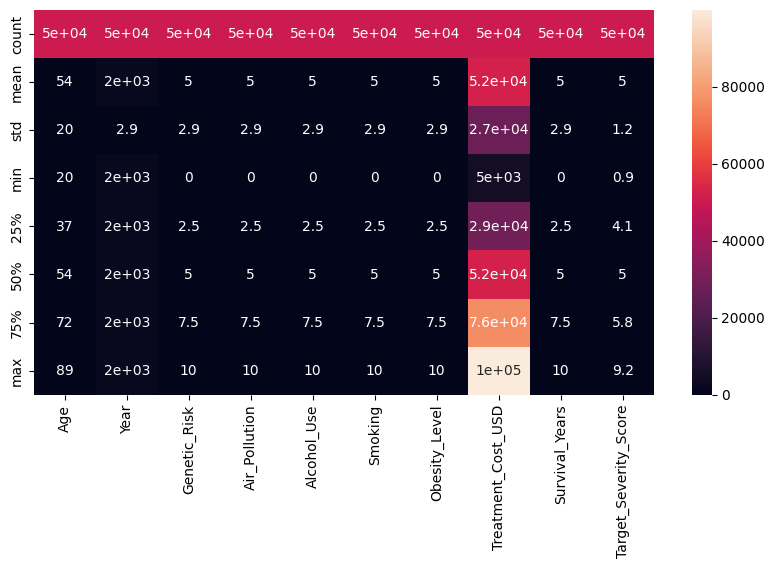

In [376]:
plt.figure(figsize=(10,5))
sns.heatmap(df.describe().round(2),annot=True)

In [377]:
df['Cancer_Stage'].unique()

array(['Stage III', 'Stage 0', 'Stage II', 'Stage I', 'Stage IV'],
      dtype=object)

In [378]:
df['Cancer_Type'].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [379]:
df['Country_Region'].unique()

array(['UK', 'China', 'Pakistan', 'Brazil', 'Germany', 'Canada', 'USA',
       'India', 'Australia', 'Russia'], dtype=object)

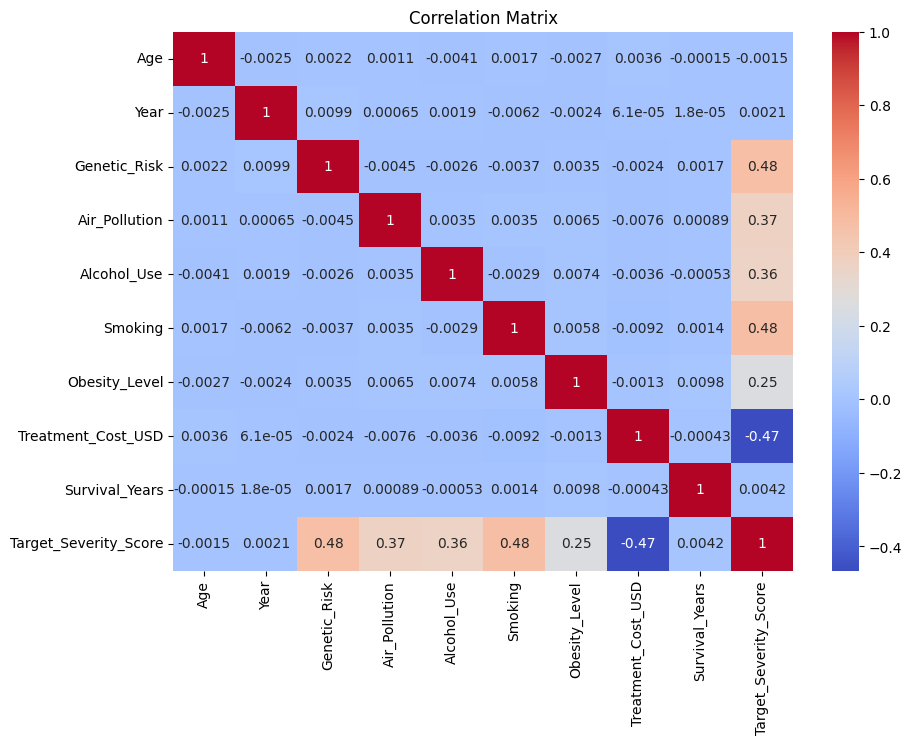

In [380]:
plt.figure(figsize=(10,7))
num_col = df.select_dtypes(include=np.number).columns
correlation_matrix = df[num_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#DATA WRANGLING
*   Data cleaning
*   Outlier Detection
*   Drop unimportant columns



In [381]:
df.isna().sum()

,0
Patient_ID,0
Age,0
Gender,0
Country_Region,0
Year,0
Genetic_Risk,0
Air_Pollution,0
Alcohol_Use,0
Smoking,0
Obesity_Level,0


In [382]:
df.duplicated().sum()

np.int64(0)

In [383]:
df=df.rename(columns={'Target_Severity_Score':'Risk_level'})

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Age'),
  Text(1, 0, 'Genetic_Risk'),
  Text(2, 0, 'Air_Pollution'),
  Text(3, 0, 'Alcohol_Use'),
  Text(4, 0, 'Smoking'),
  Text(5, 0, 'Obesity_Level'),
  Text(6, 0, 'Risk_level')])

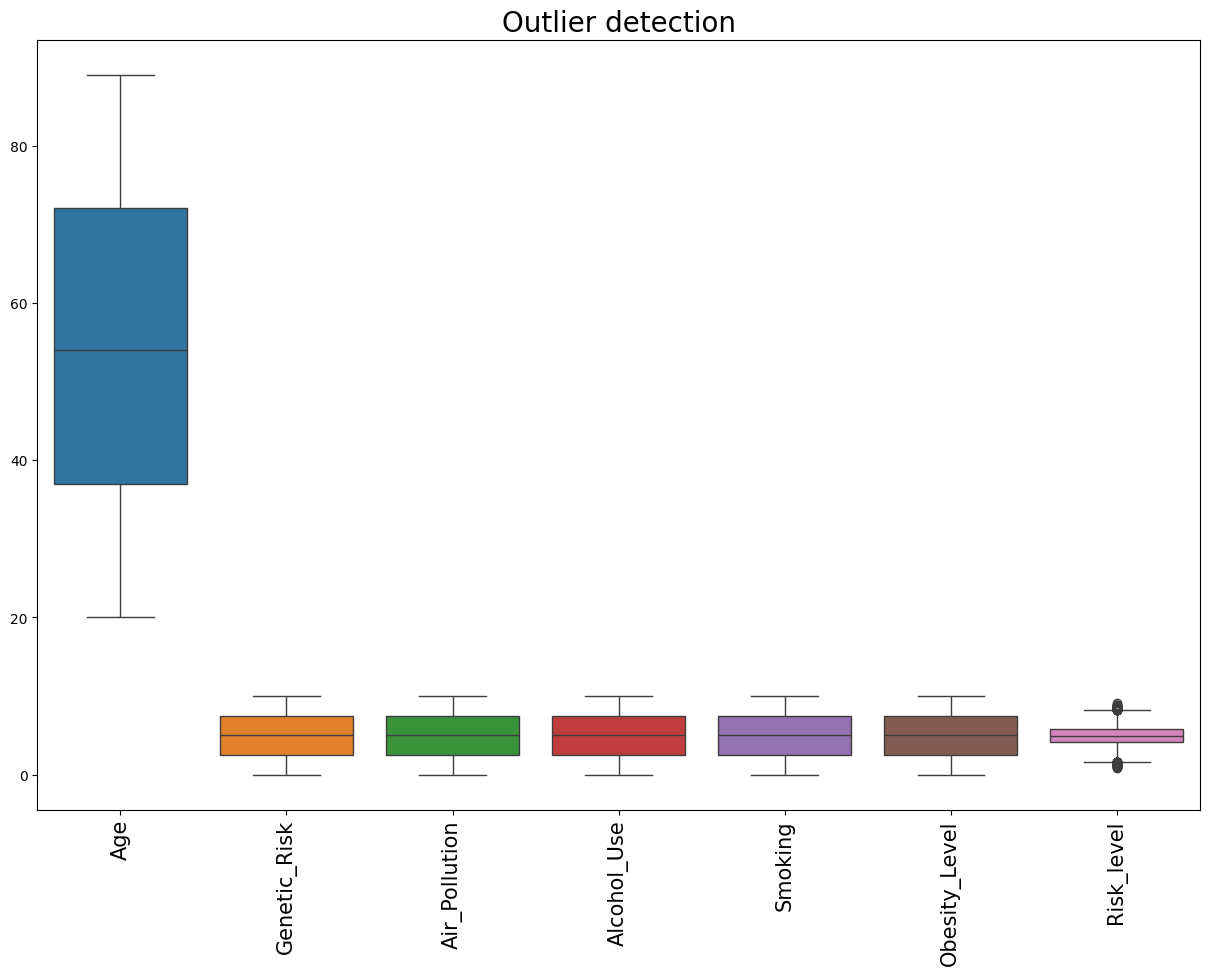

In [384]:
plt.figure(figsize=(15,10))
sns.boxplot(df[['Age','Genetic_Risk','Air_Pollution','Alcohol_Use','Smoking','Obesity_Level','Risk_level']])
plt.title('Outlier detection',fontsize=20)
plt.xticks(rotation=90,fontsize=15)

In [385]:
df.drop(columns=['Patient_ID'],inplace=True)

#EDA
* Create some of pivot_table
* Make correlation between features
* Alot of Visualization between Features & Target
* Some insights like (top countries , top 1000caseswhich cancer type is the most , ....)






<ipython-input-386-128868e6cf31>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df,x='Age',kde=True,bins=20,palette='Set2',edgecolor='black',linewidth=1,alpha=0.7)


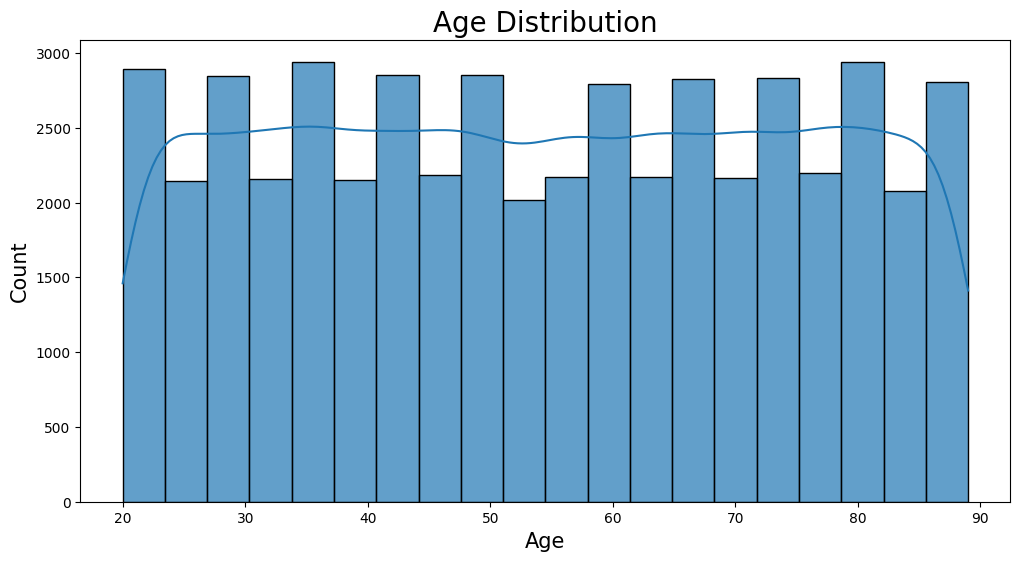

In [386]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='Age',kde=True,bins=20,palette='Set2',edgecolor='black',linewidth=1,alpha=0.7)
plt.title('Age Distribution',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

<ipython-input-387-9c86424a544b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='Age',y='Risk_level',palette='Set2',linewidth=2,marker='o',markersize=8,alpha=0.7,ci=None,err_style='bars')
<ipython-input-387-9c86424a544b>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df,x='Age',y='Risk_level',palette='Set2',linewidth=2,marker='o',markersize=8,alpha=0.7,ci=None,err_style='bars')


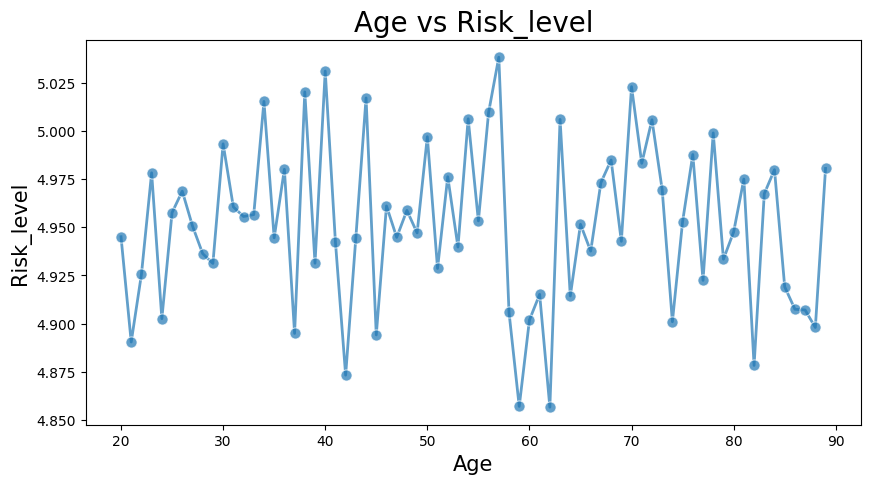

In [387]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df,x='Age',y='Risk_level',palette='Set2',linewidth=2,marker='o',markersize=8,alpha=0.7,ci=None,err_style='bars')
plt.title('Age vs Risk_level',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Risk_level',fontsize=15)
plt.show()

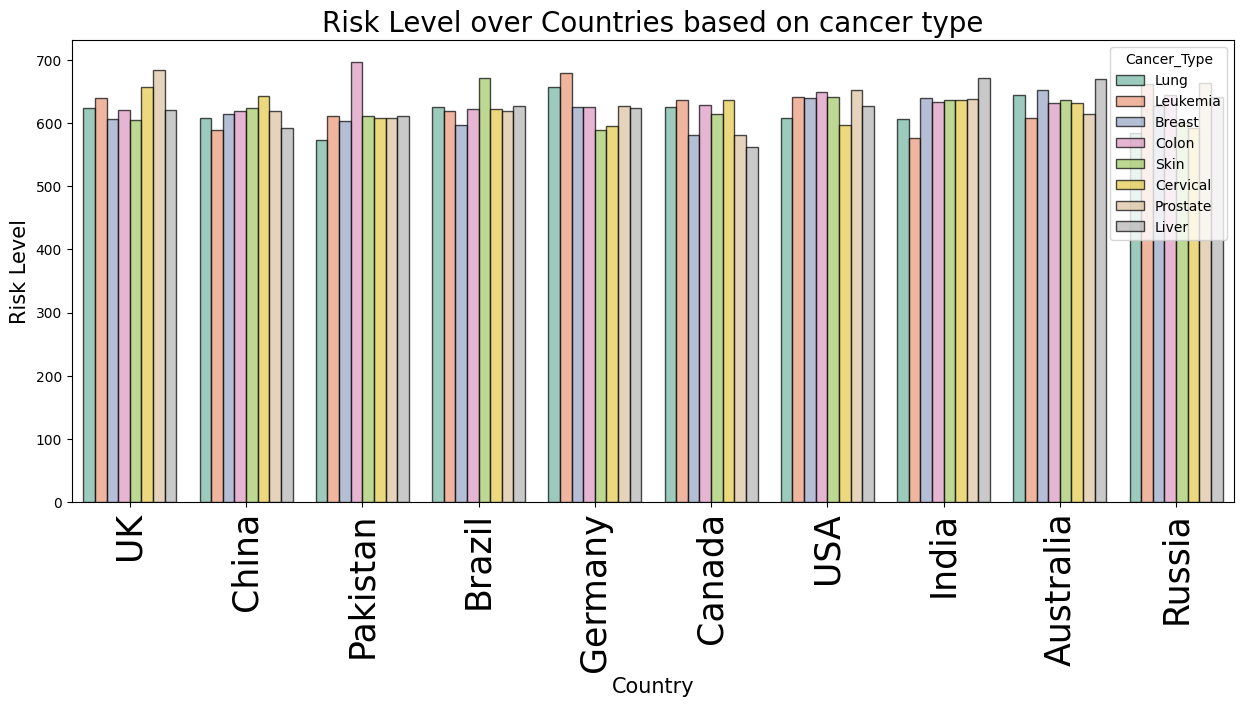

In [388]:
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='Country_Region',hue='Cancer_Type',palette='Set2',edgecolor='black',linewidth=1,alpha=0.7)
plt.title('Risk Level over Countries based on cancer type',fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.ylabel('Risk Level',fontsize=15)
plt.xticks(rotation=90,fontsize=25,horizontalalignment='center')
plt.show()

Text(0, 0.5, 'Risk Level')

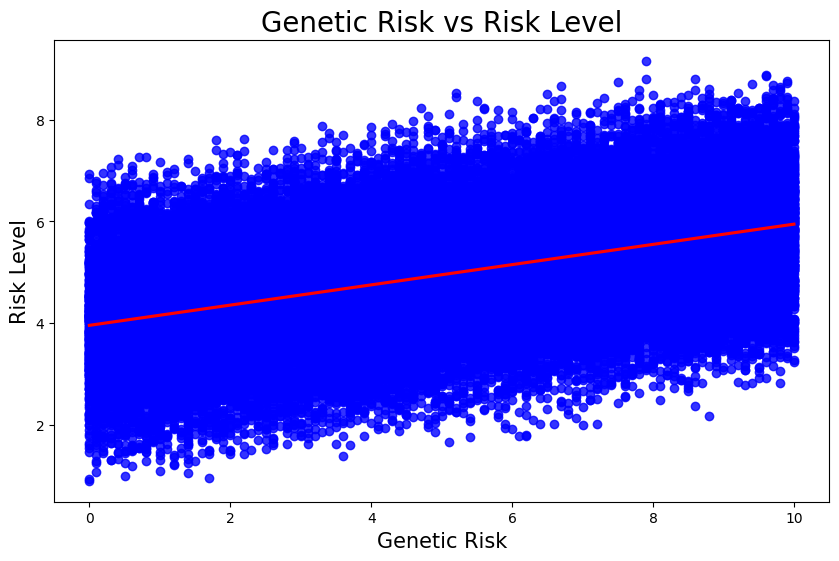

In [389]:
plt.figure(figsize=(10,6))
sns.regplot(data=df,x='Genetic_Risk',y='Risk_level',scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Genetic Risk vs Risk Level',fontsize=20)
plt.xlabel('Genetic Risk',fontsize=15)
plt.ylabel('Risk Level',fontsize=15)

<Axes: xlabel='Air_Pollution', ylabel='Risk_level'>

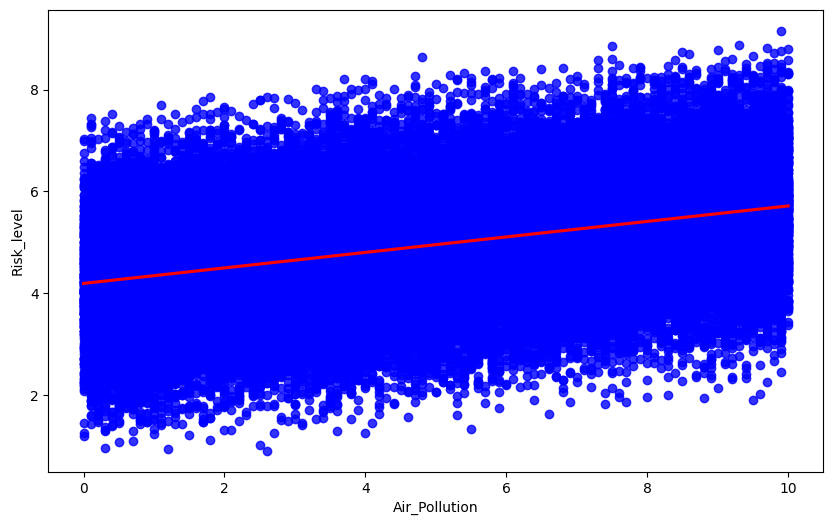

In [390]:
plt.figure(figsize=(10,6))
sns.regplot(data=df,x='Air_Pollution',y='Risk_level',scatter_kws={'color':'blue'},line_kws={'color':'red'})

<ipython-input-391-60e6273f663b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df,x='Cancer_Type',y='Risk_level',palette='Set2',edgecolor='black',linewidth=1,alpha=0.7)


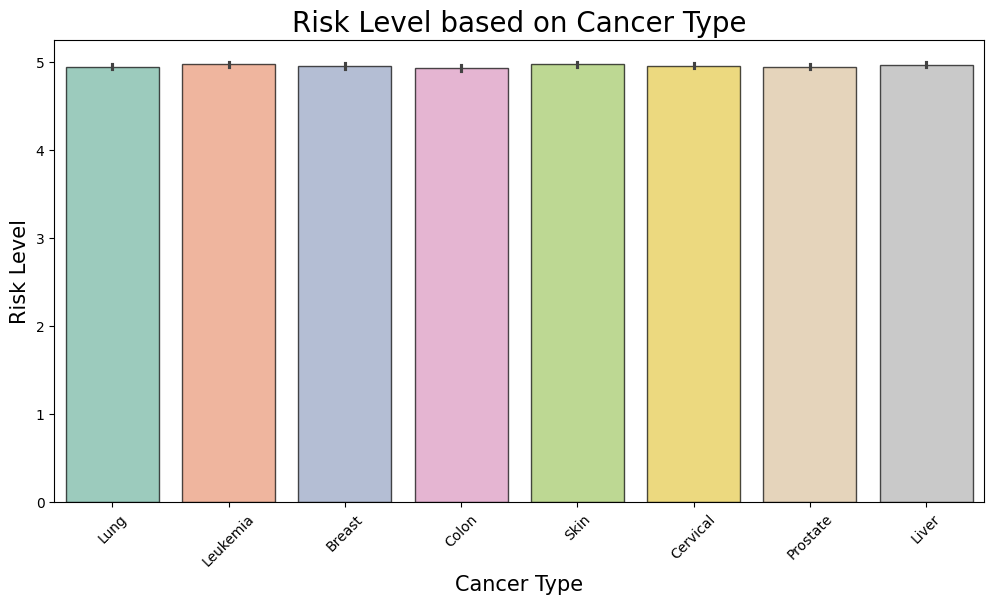

In [391]:
plt.figure(figsize=(12,6))
sns.barplot(data=df,x='Cancer_Type',y='Risk_level',palette='Set2',edgecolor='black',linewidth=1,alpha=0.7)
plt.title('Risk Level based on Cancer Type',fontsize=20)
plt.xlabel('Cancer Type',fontsize=15)
plt.ylabel('Risk Level',fontsize=15)
plt.xticks(rotation=45)
plt.show()

<ipython-input-392-fc82c4797d49>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df,x='Cancer_Type',y='Treatment_Cost_USD',palette='Set2',linewidth=1,alpha=0.7,ci=None,err_style='bars',marker='o',markersize=8,sort=False)
<ipython-input-392-fc82c4797d49>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df,x='Cancer_Type',y='Treatment_Cost_USD',palette='Set2',linewidth=1,alpha=0.7,ci=None,err_style='bars',marker='o',markersize=8,sort=False)


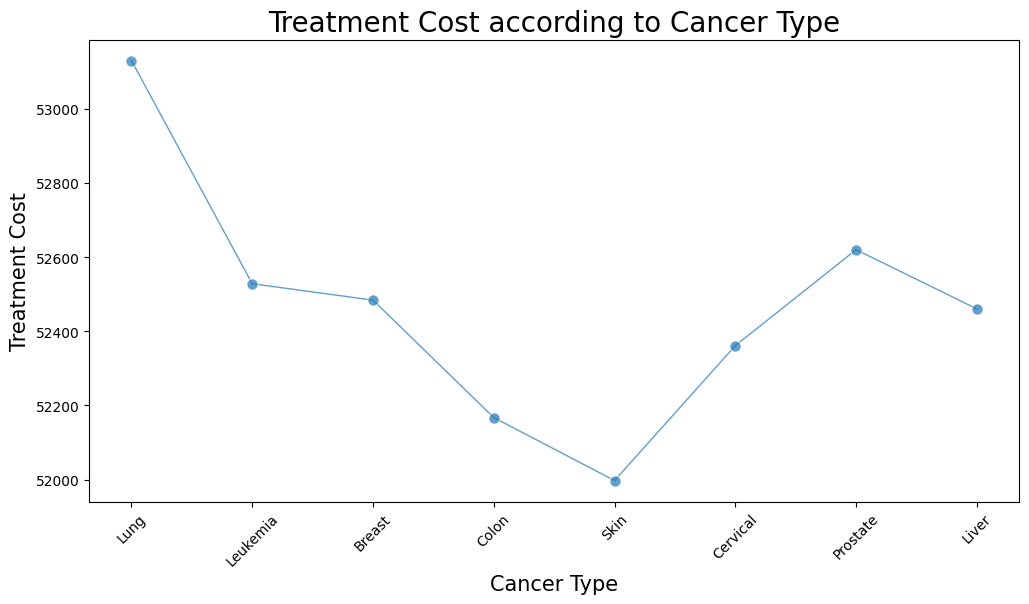

In [392]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Cancer_Type',y='Treatment_Cost_USD',palette='Set2',linewidth=1,alpha=0.7,ci=None,err_style='bars',marker='o',markersize=8,sort=False)
plt.title('Treatment Cost according to Cancer Type',fontsize=20)
plt.xlabel('Cancer Type',fontsize=15)
plt.ylabel('Treatment Cost',fontsize=15)
plt.xticks(rotation=45)
plt.show()

<ipython-input-393-2b2a8653d283>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df,x='Survival_Years',y='Risk_level',palette='Set2',linewidth=1,alpha=0.7,marker='o',markersize=8)


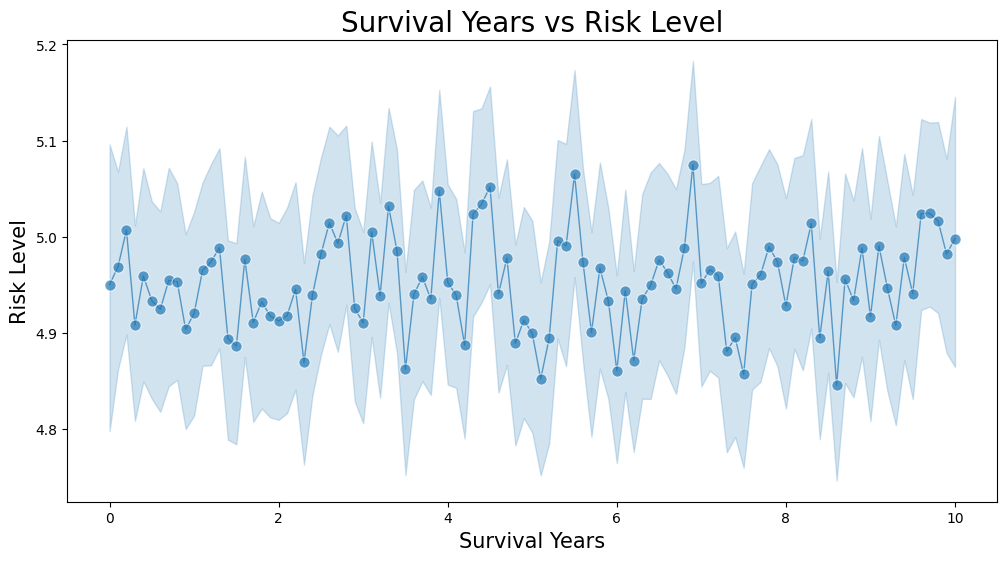

In [393]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df,x='Survival_Years',y='Risk_level',palette='Set2',linewidth=1,alpha=0.7,marker='o',markersize=8)
plt.title('Survival Years vs Risk Level',fontsize=20)
plt.xlabel('Survival Years',fontsize=15)
plt.ylabel('Risk Level',fontsize=15)
plt.show()

<Axes: xlabel='Smoking', ylabel='Risk_level'>

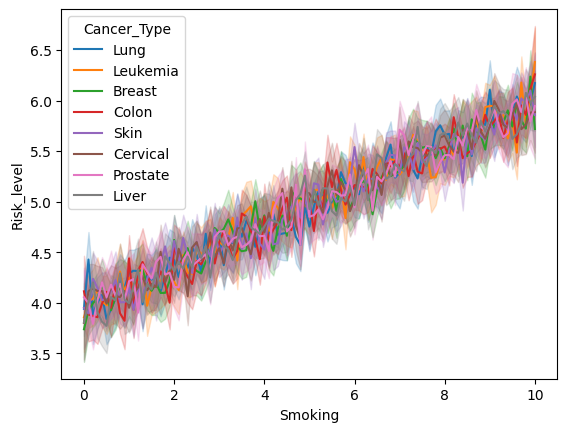

In [394]:
sns.lineplot(data=df,x='Smoking',y='Risk_level',hue='Cancer_Type')

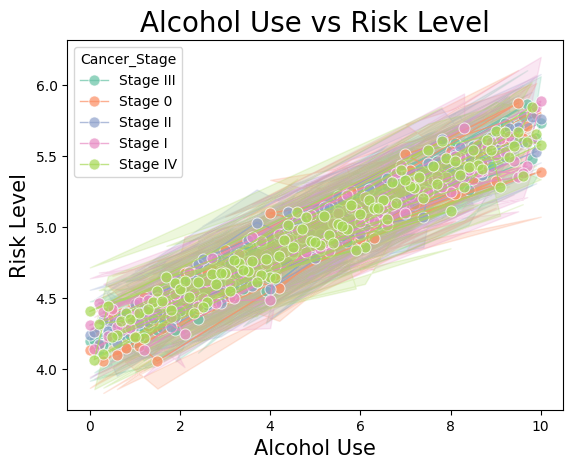

In [395]:
sns.lineplot(data=df,x='Alcohol_Use',y='Risk_level',hue='Cancer_Stage',palette='Set2',linewidth=1,alpha=0.7,marker='o',markersize=8,sort=False)
plt.title('Alcohol Use vs Risk Level',fontsize=20)
plt.xlabel('Alcohol Use',fontsize=15)
plt.ylabel('Risk Level',fontsize=15)
plt.show()

In [396]:
df[df['Risk_level']==df['Risk_level'].max()]

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Risk_level
3175,45,Other,Australia,2022,7.9,9.9,8.9,9.4,10.0,Cervical,Stage II,5989.92,5.8,9.16


In [397]:
top_1000_cases_by_risk_level=df.nlargest(1000,'Risk_level')
top_1000_cases_by_risk_level=top_1000_cases_by_risk_level[['Cancer_Type','Genetic_Risk','Country_Region','Risk_level']].sort_values('Risk_level',ascending=False).reset_index(drop=True)
top_1000_cases_by_risk_level

,Cancer_Type,Genetic_Risk,Country_Region,Risk_level
0,Cervical,7.9,Australia,9.16
1,Colon,9.6,Brazil,8.87
2,Lung,9.6,Pakistan,8.86
3,Leukemia,7.9,UK,8.81
4,Skin,8.6,UK,8.80
...,...,...,...,...
995,Skin,9.3,China,7.38
996,Cervical,9.6,Germany,7.38
997,Prostate,9.1,UK,7.37
998,Liver,5.7,USA,7.37


In [398]:
top_1000_cases_by_risk_level['Cancer_Type'].value_counts()

,count
Cancer_Type,
Leukemia,137
Prostate,137
Liver,136
Colon,125
Lung,121
Cervical,119
Breast,117
Skin,108


<ipython-input-399-2233248f0c0d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=top_1000_cases_by_risk_level,x='Cancer_Type',y='Risk_level',palette='Set2',linewidth=1,alpha=0.7,marker='o',markersize=8,sort=False,ci=None,err_style='bars')
<ipython-input-399-2233248f0c0d>:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=top_1000_cases_by_risk_level,x='Cancer_Type',y='Risk_level',palette='Set2',linewidth=1,alpha=0.7,marker='o',markersize=8,sort=False,ci=None,err_style='bars')


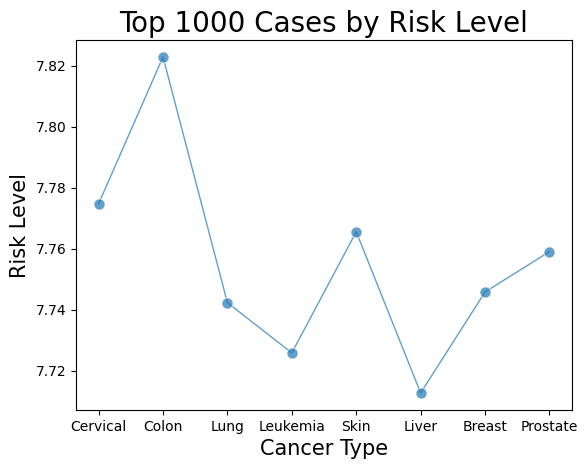

In [399]:
sns.lineplot(data=top_1000_cases_by_risk_level,x='Cancer_Type',y='Risk_level',palette='Set2',linewidth=1,alpha=0.7,marker='o',markersize=8,sort=False,ci=None,err_style='bars')
plt.title('Top 1000 Cases by Risk Level',fontsize=20)
plt.xlabel('Cancer Type',fontsize=15)
plt.ylabel('Risk Level',fontsize=15)
plt.show()

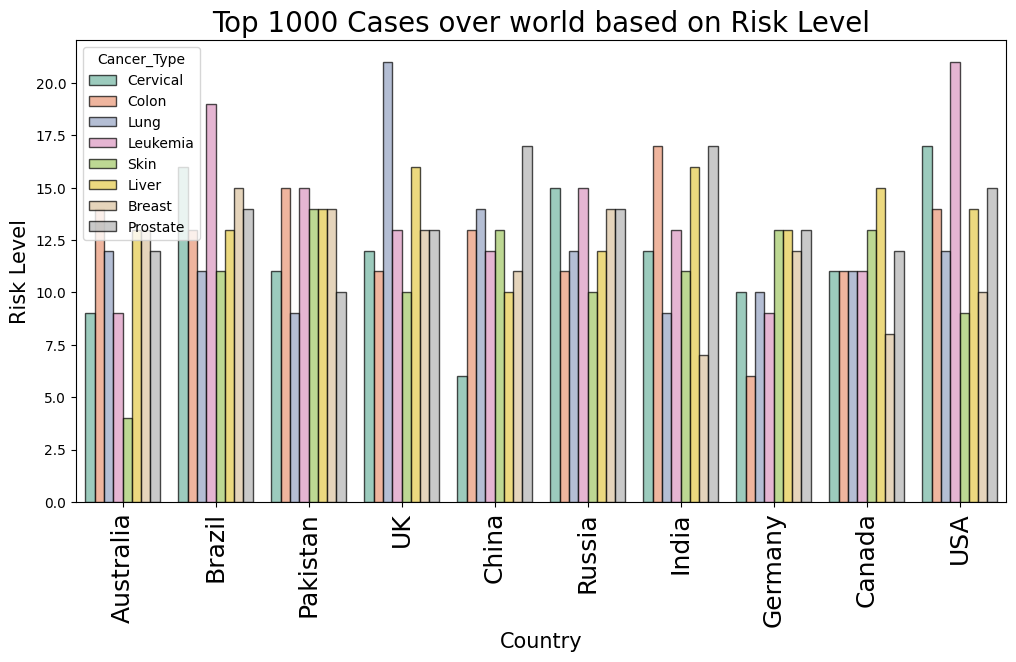

In [400]:
plt.figure(figsize=(12,6))
sns.countplot(data=top_1000_cases_by_risk_level,hue='Cancer_Type',palette='Set2',edgecolor='black',linewidth=1,alpha=0.7,x='Country_Region',dodge=True,orient='h',ax=None,hue_order=None,order=None,color=None,saturation=0.75)
plt.title('Top 1000 Cases over world based on Risk Level',fontsize=20)
plt.xlabel('Country',fontsize=15)
plt.xticks(rotation=90,fontsize=18,horizontalalignment='center')
plt.ylabel('Risk Level',fontsize=15)
plt.show()

In [401]:
pv_1=df.pivot_table(index='Gender',columns='Cancer_Type',values='Survival_Years',aggfunc='count')
pv_1

Cancer_Type,Breast,Cervical,Colon,Leukemia,Liver,Lung,Prostate,Skin
Gender,,,,,,,,
Female,2051,2160,2108,2081,2064,2067,2113,2065
Male,2080,2028,2147,2092,2091,2103,2138,2117
Other,2058,2034,2121,2093,2094,1989,2057,2049


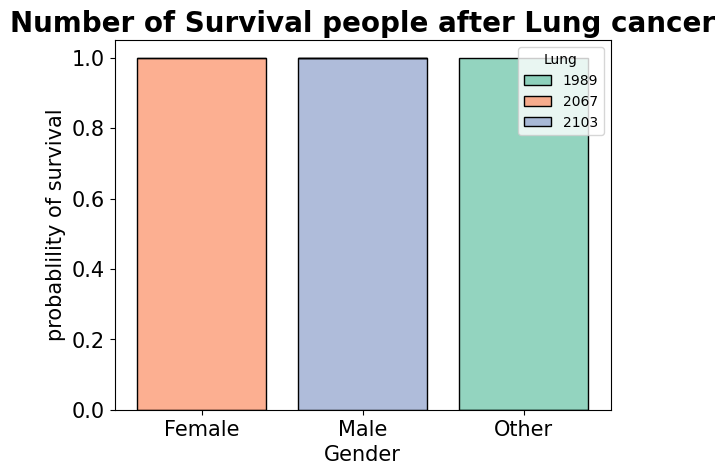

In [402]:
sns.histplot(data=pv_1,x=pv_1.index,hue='Lung',palette='Set2',edgecolor='black',linewidth=1,alpha=0.7,multiple='stack',stat='count',element='bars',binwidth=1,shrink=0.8,discrete=True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Gender',fontsize=15)
plt.title('Number of Survival people after Lung cancer',fontsize=20,weight='bold')
plt.xlabel('Gender',fontsize=15)
plt.ylabel('probablility of survival',fontsize=15)
plt.show()

In [403]:
pv_2=df.pivot_table(index='Country_Region',columns='Cancer_Type',values='Risk_level' ,aggfunc='mean')
pv_2

Cancer_Type,Breast,Cervical,Colon,Leukemia,Liver,Lung,Prostate,Skin
Country_Region,,,,,,,,
Australia,4.990888,4.990301,4.996677,4.931363,4.944179,4.794992,4.930505,4.993312
Brazil,4.918610,4.921752,4.893002,4.988643,4.945343,4.929441,4.915396,4.959687
Canada,4.940809,5.024575,4.902369,4.903789,4.997776,4.996016,4.961136,4.974479
China,4.985057,4.844930,4.891742,4.939288,4.924654,4.948851,5.033263,4.936474
Germany,4.986752,4.917097,4.946182,4.988277,4.924567,4.908356,4.937033,4.940797
India,4.863313,4.956170,4.974250,5.001127,4.993577,4.953344,4.870798,4.957579
Pakistan,4.993394,4.938898,4.926557,4.952663,4.964059,4.945523,4.889753,5.039788
Russia,4.960048,4.977352,4.926946,5.001208,4.998302,4.904469,4.939427,4.978083
UK,4.894752,4.930304,4.890950,4.974922,5.015475,5.018990,4.972847,4.965207


<ipython-input-404-63debea1b5da>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pv_2,x=pv_2.index,y='Prostate',palette='Set2',edgecolor='black',linewidth=1,alpha=0.7)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Australia'),
  Text(1, 0, 'Brazil'),
  Text(2, 0, 'Canada'),
  Text(3, 0, 'China'),
  Text(4, 0, 'Germany'),
  Text(5, 0, 'India'),
  Text(6, 0, 'Pakistan'),
  Text(7, 0, 'Russia'),
  Text(8, 0, 'UK'),
  Text(9, 0, 'USA')])

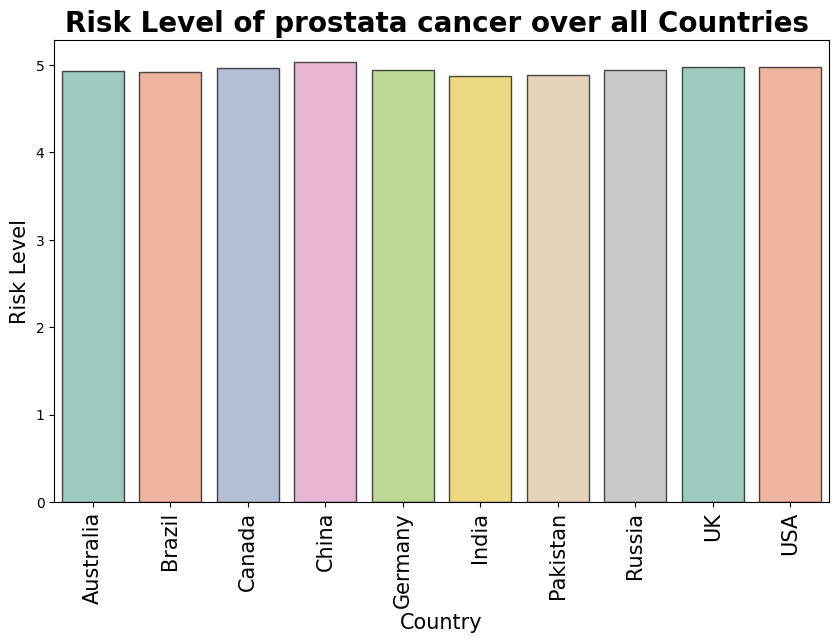

In [404]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pv_2,x=pv_2.index,y='Prostate',palette='Set2',edgecolor='black',linewidth=1,alpha=0.7)
plt.title('Risk Level of prostata cancer over all Countries ' ,fontsize=20,weight='bold')
plt.xlabel('Country',fontsize=15)
plt.ylabel('Risk Level',fontsize=15)
plt.xticks(rotation=90,fontsize=15,horizontalalignment='center')

# Feature ENG
*  change target to classes
*  Encoding target
*  Encoding features
*  Scaling features



In [405]:
from re import M
ln=LabelEncoder()
sc=StandardScaler()
mn=MinMaxScaler()

In [406]:
df.head(3)

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Risk_level
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84


In [407]:
df['Gender']=ln.fit_transform(df[['Gender']])
df['Cancer_Stage']=df['Cancer_Stage'].map({'Stage 0':0,
'Stage I':1,'Stage II':2,'Stage III':3,'Stage IV':4})
df['Cancer_Type']=ln.fit_transform(df[['Cancer_Type']])

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [408]:
bins_target=[0,3,6,10]
lables_target=['low','medium','high']
df['Risk_level']=pd.cut(df['Risk_level'],bins=bins_target,labels=lables_target)

In [409]:
df['Risk_level']=df['Risk_level'].map({'low':0,'medium':1,'high':2})

In [410]:
df.drop(columns=['Country_Region','Year'],inplace=True)

In [411]:
df['Age']=sc.fit_transform(df[['Age']])
df['Treatment_Cost_USD']=sc.fit_transform(df[['Treatment_Cost_USD']])

In [412]:
df['Risk_level'].value_counts()

,count
Risk_level,
1,37536
2,9821
0,2643


In [413]:
df.head(3)

,Age,Gender,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Risk_level
0,0.819732,1,6.4,2.8,9.5,0.9,8.7,5,3,0.381762,5.9,1
1,-1.009755,1,1.3,4.5,3.7,3.9,6.3,3,0,-1.457952,4.7,1
2,1.264742,1,7.4,7.9,2.4,4.7,0.1,0,2,-1.662210,7.1,1


# Modeling


*   create model
*   choose hyperparametrs based on gridsearch
*   feature selection based on rfe
*   Model Evalution (classifaction reprot)
*   check overfitting
*   confustion matrix







In [414]:
lr=LogisticRegression()
svm=SVC()
rfc=RandomForestClassifier()

In [415]:
X = df.drop("Risk_level", axis=1)
y = df["Risk_level"]
# SVM
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm, svm_params, cv=5, scoring='accuracy')
svm_grid.fit(X, y)
print("SVM Best Params:", svm_grid.best_params_)
print("SVM Best Score:", svm_grid.best_score_)

# Random Forest
rfc_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
rfc_grid = GridSearchCV(rfc, rfc_params, cv=5, scoring='accuracy')
rfc_grid.fit(X, y)
print("\nRandom Forest Best Params:", rfc_grid.best_params_)
print("Random Forest Best Score:", rfc_grid.best_score_)

# Logistic Regression
lr_params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X, y)
print("\nLogistic Regression Best Params:", lr_grid.best_params_)
print("Logistic Regression Best Score:", lr_grid.best_score_)

'X = df.drop("Risk_level", axis=1)\ny = df["Risk_level"]\n# SVM\nsvm_params = {\n    \'C\': [0.1, 1, 10],\n    \'kernel\': [\'linear\', \'rbf\'],\n    \'gamma\': [\'scale\', \'auto\']\n}\nsvm_grid = GridSearchCV(svm, svm_params, cv=5, scoring=\'accuracy\')\nsvm_grid.fit(X, y)\nprint("SVM Best Params:", svm_grid.best_params_)\nprint("SVM Best Score:", svm_grid.best_score_)\n\n# Random Forest\nrfc_params = {\n    \'n_estimators\': [100, 200],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5]\n}\nrfc_grid = GridSearchCV(rfc, rfc_params, cv=5, scoring=\'accuracy\')\nrfc_grid.fit(X, y)\nprint("\nRandom Forest Best Params:", rfc_grid.best_params_)\nprint("Random Forest Best Score:", rfc_grid.best_score_)\n\n# Logistic Regression\nlr_params = {\n    \'C\': [0.01, 0.1, 1, 10],\n    \'penalty\': [\'l2\'],\n    \'solver\': [\'lbfgs\']\n}\nlr_grid = GridSearchCV(lr, lr_params, cv=5, scoring=\'accuracy\')\nlr_grid.fit(X, y)\nprint("\nLogistic Regression Best Params:", lr_grid.

In [416]:
lr=LogisticRegression(C=0.01,penalty='l2',solver='lbfgs')
svm=SVC(C=0.01,gamma='scale',kernel='linear')
rfc=RandomForestClassifier(max_depth=None,min_samples_split=2,n_estimators=300)

In [417]:
X=df.drop(columns=['Risk_level'])
y=df['Risk_level']

In [418]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [419]:
lr.fit(X_train,y_train)
svm.fit(X_train,y_train)
rfc.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(n_estimators=300)

In [420]:
print("LR:",accuracy_score(y_test,lr.predict(X_test)))
print("SVM:",accuracy_score(y_test,svm.predict(X_test)))
print("RF:",accuracy_score(y_test,rfc.predict(X_test)))

LR: 0.9857
SVM: 0.9927
RF: 0.9436


In [421]:
def check_overfit(svm, X_train, y_train, X_test, y_test):
    ta = accuracy_score(y_train, svm.predict(X_train))
    va = accuracy_score(y_test, svm.predict(X_test))
    print(f"Train: {ta:.2f} | Test: {va:.2f} → {'Overfitting' if ta - va > 0.05 else 'OK'}")
    lr.fit(X_train, y_train)
check_overfit(lr, X_train, y_train, X_test, y_test)

Train: 0.98 | Test: 0.99 → OK


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [422]:
def check_overfit(svm, X_train, y_train, X_test, y_test):
    ta = accuracy_score(y_train, svm.predict(X_train))
    va = accuracy_score(y_test, svm.predict(X_test))
    print(f"Train: {ta:.2f} | Test: {va:.2f} → {'Overfitting' if ta - va > 0.05 else 'OK'}")
    svm.fit(X_train, y_train)
check_overfit(svm, X_train, y_train, X_test, y_test)

Train: 0.99 | Test: 0.99 → OK


In [423]:
def check_overfit(svm, X_train, y_train, X_test, y_test):
    ta = accuracy_score(y_train, svm.predict(X_train))
    va = accuracy_score(y_test, svm.predict(X_test))
    print(f"Train: {ta:.2f} | Test: {va:.2f} → {'Overfitting' if ta - va > 0.05 else 'OK'}")
    rfc.fit(X_train, y_train)
check_overfit(rfc, X_train, y_train, X_test, y_test)

Train: 1.00 | Test: 0.94 → Overfitting


In [424]:
from sklearn.feature_selection import RFE
selector = RFE(estimator=rfc, n_features_to_select=9)
selector.fit(X_train, y_train)
print(X_train.columns[selector.support_])

Index(['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use', 'Smoking',
       'Obesity_Level', 'Cancer_Type', 'Treatment_Cost_USD', 'Survival_Years'],
      dtype='object')


In [425]:
X_new=df.drop(columns=['Risk_level','Gender','Age'])
y=df['Risk_level']

In [426]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [427]:
lr.fit(X_train,y_train)
svm.fit(X_train,y_train)
rfc.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(n_estimators=300)

In [428]:
print("LR:",accuracy_score(y_test,lr.predict(X_test)))
print("SVM:",accuracy_score(y_test,svm.predict(X_test)))
print("Random_forest:",accuracy_score(y_test,rfc.predict(X_test)))

LR: 0.9865
SVM: 0.9933
Random_forest: 0.9494


In [429]:
def check_overfit(svm, X_train, y_train, X_test, y_test):
    ta = accuracy_score(y_train, svm.predict(X_train))
    va = accuracy_score(y_test, svm.predict(X_test))
    print(f"Train: {ta:.2f} | Test: {va:.2f} → {'Overfitting' if ta - va > 0.05 else 'OK'}")
    lr.fit(X_train, y_train)
check_overfit(lr, X_train, y_train, X_test, y_test)

Train: 0.99 | Test: 0.99 → OK


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [430]:
def check_overfit(svm, X_train, y_train, X_test, y_test):
    ta = accuracy_score(y_train, svm.predict(X_train))
    va = accuracy_score(y_test, svm.predict(X_test))
    print(f"Train: {ta:.2f} | Test: {va:.2f} → {'Overfitting' if ta - va > 0.05 else 'OK'}")
    svm.fit(X_train, y_train)
check_overfit(svm, X_train, y_train, X_test, y_test)

Train: 0.99 | Test: 0.99 → OK


In [431]:
def check_overfit(svm, X_train, y_train, X_test, y_test):
    ta = accuracy_score(y_train, svm.predict(X_train))
    va = accuracy_score(y_test, svm.predict(X_test))
    print(f"Train: {ta:.2f} | Test: {va:.2f} → {'Overfitting' if ta - va > 0.05 else 'OK'}")
    rfc.fit(X_train, y_train)
check_overfit(rfc, X_train, y_train, X_test, y_test)

Train: 1.00 | Test: 0.95 → Overfitting


In [432]:
score_lr=cross_val_score(lr,X_train,y_train,cv=10)
score_lr

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.9805 , 0.98025, 0.98525, 0.9815 , 0.98975, 0.98525, 0.985  ,
       0.98575, 0.98575, 0.988  ])

In [363]:
score_svm=cross_val_score(svm,X_train,y_train,cv=10)
score_svm

array([0.96875, 0.9685 , 0.97175, 0.96975, 0.97075, 0.97075, 0.97   ,
       0.9725 , 0.972  , 0.9695 ])

In [364]:
score_rfc=cross_val_score(rfc,X_train,y_train,cv=10)
score_rfc

array([0.94525, 0.94675, 0.9475 , 0.943  , 0.94675, 0.94975, 0.95125,
       0.95325, 0.9445 , 0.94875])

In [365]:
print("LOGESTIC REGRESSTION REPORT")
print(classification_report(y_test,lr.predict(X_test)))

LOGESTIC REGRESSTION REPORT
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       517
           1       0.94      0.99      0.97      7562
           2       0.98      0.89      0.93      1921

    accuracy                           0.95     10000
   macro avg       0.97      0.80      0.86     10000
weighted avg       0.95      0.95      0.95     10000



In [366]:
print("SVC REPORT")
print(classification_report(y_test,svm.predict(X_test)))

SVC REPORT
              precision    recall  f1-score   support

           0       0.99      0.74      0.85       517
           1       0.97      1.00      0.98      7562
           2       0.99      0.94      0.96      1921

    accuracy                           0.97     10000
   macro avg       0.98      0.89      0.93     10000
weighted avg       0.97      0.97      0.97     10000



In [367]:
print("RANDOM FOREST REPORT")
print(classification_report(y_test,rfc.predict(X_test)))

RANDOM FOREST REPORT
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       517
           1       0.94      0.99      0.97      7562
           2       0.96      0.86      0.90      1921

    accuracy                           0.95     10000
   macro avg       0.96      0.85      0.89     10000
weighted avg       0.95      0.95      0.95     10000



<Figure size 1500x1200 with 0 Axes>

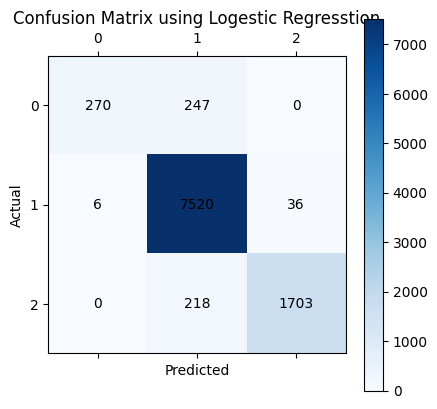

In [368]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(15,12))
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='Blues')
plt.title("Confusion Matrix using Logestic Regresstion")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center', color='black')
plt.show()

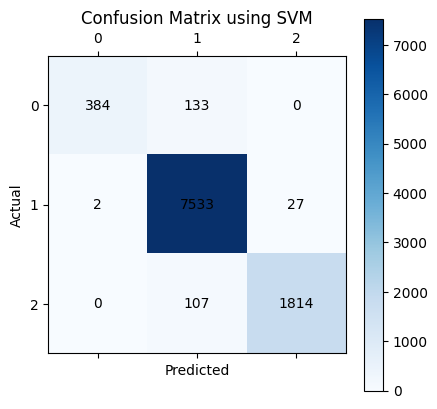

In [369]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='Blues')
plt.title("Confusion Matrix using SVM")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center', color='black')
plt.show()

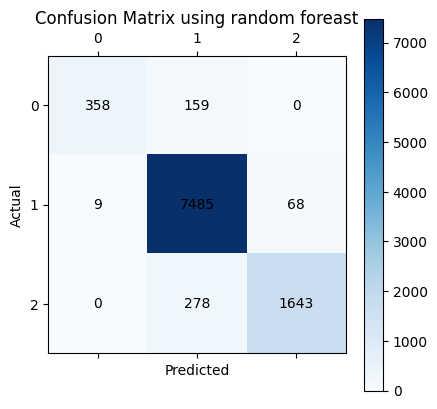

In [370]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap='Blues')
plt.title("Confusion Matrix using random foreast")
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('Actual')
for (i, j), val in np.ndenumerate(cm):
    plt.text(j, i, val, ha='center', va='center', color='black')
plt.show()